# Notations and Data

## Notations

Several notations:

- $\mathbf{v'}$ and $\mathbf{M'}$ denote the transposes of $\mathbf{v}$ and $\mathbf{M}$, where $\mathbf{M}=[m]_{i,j}$, where $i$ and $j$ are row and column indices.
- Dependent variables: $\mathbf{y}=y_i$
- Features: $\mathbf{X}_i=(x_{i,1},...,x_{i,K})$, with dimenstion $I\times K$. This means there are $I$ observatinons and each of them has $K$ attributes.
- Discrete returns: $r_{t,n}=p_{t,n}/p_{t-1,n}-1$ where $t$ is time index and $n$ is asset index
- Time series notations: $x_{t,n}^{(k)}$ is the time-$t$ value of the $k^{th}$ attribute of asset $n$
- $\mathbf{x}_{t,n}$ is a vector of all attributes for time-$t$ and asset $n$
- $\mathbf{r}_t, \mathbf{r}_n$ and $r_{t,f}$ (riskless asset)
- $\mathbf{I}_N$ denotes the $(N \times N)$ identity matrix
- $\mathbb{E}[\cdot]$ and $\mathbb{E}_t[\cdot]$ are expectation and conditional expectation operators
- Filtration $\mathcal{F}_t$ is all information available at time $t$
- $\mathbb{V}[\cdot]$ is the variance operator
- Both $P$ and $\mathbb{P}$ are probabilities, while $f$ and $F$ are p.d.f. and c.d.f. respectively
- $X\stackrel{d}{=}Y$ (equality in distribution) means $F_X(z)=F_Y(z)$ for all $z$
- Stationarity: a random process $X_t$ satisfies $X_t \stackrel{d}{=} X_s$
- $x \propto y$ means $x$ is proportional to $y$
- $1_{\{x\}}=1$ when $x$ is true else 0
- $\phi(\cdot)$ and $\Phi(\cdot)$ are standard Gaussian pdf and cdf.
- $card(\cdot)=\#(\cdot)$ are cardinal function which evaluates the number of elements in a given set
- $\lfloor x \rfloor$ is the integer part function
- $[x]^{+}=\max(0,x)$
- $\tanh(x)=\dfrac{e^x-e^{-x}}{e^x+e^{-x}}$
- $ReLu(x)=\max(0,x)$
- $s(x)$ is the softmax function where $s(\mathbf{x})_i=\dfrac{e^{x_i}}{\sum_j e^{x_j}}$

## Dataset
The original repository can be accessed [here](https://github.com/shokru/mlfactor.github.io/tree/master/material), while the .xlsx version of data set can be accessed [here](https://drive.google.com/file/d/17wm7QOqy90s7Jy-v1ZEO-iOkZn4mdXP7/view?usp=sharing). This dataset comprises information on 1,207 stocks listed in the US (possibly originating from Canada or Mexico). The time range starts in November 1998 and ends in March 2019. For each point in time, 93 characteristics describe the firms in the sample. These attributes cover a wide range of topics including:

- **valuation** (earning yields, accounting ratios)
- **profitability** and quality (ROE, etc.)
- **momentum** and technical analysis (past returns, RSI, ...)
- **risk** (volatilities)
- **estimates** (EPS)
- **volume and liquidity** (share turnover)

In [51]:
import pandas as pd
import pyreadr
# data = pd.read_excel("./data/data_ml.xlsx") # Not Recommended. Too Slow!
result = pyreadr.read_r('./data/data_ml.RData')
data = result['data_ml']

In [52]:
data['date'] = pd.to_datetime(data['date'])
data = data[(data['date'] > "1999-12-31") & (data['date'] < "2019-01-01")].sort_values(by = ["stock_id", "date"]).reset_index().drop(columns = "index")
data.head()

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,1,2000-01-31,0.41,0.39,0.42,0.19,0.65,0.63,0.5,0.9,...,0.74,0.82,0.88,0.74,0.77,0.68,-0.036,0.196,0.255,1.044
1,1,2000-02-29,0.41,0.39,0.40,0.19,0.81,0.63,0.5,0.9,...,0.74,0.82,0.88,0.74,0.73,0.67,0.263,0.797,0.669,1.192
2,1,2000-03-31,0.40,0.37,0.37,0.20,0.68,0.65,0.5,0.9,...,0.76,0.83,0.87,0.75,0.67,0.66,0.031,0.275,0.419,0.495
3,1,2000-04-30,0.39,0.36,0.37,0.20,0.38,0.65,0.5,0.9,...,0.76,0.83,0.87,0.75,0.63,0.65,0.448,0.042,0.267,0.853
4,1,2000-05-31,0.40,0.42,0.40,0.20,0.60,0.65,0.5,0.9,...,0.76,0.83,0.87,0.75,0.54,0.67,-0.097,-0.071,0.027,0.413


The data has 99 columns and 268336 rows. The first two columns indicate the stock identifier and the date. The next 93 columns are the features. The last four columns are the labels. The points are sampled at the monthly frequency.

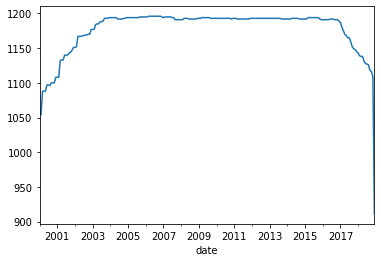

In [37]:
import matplotlib.pyplot as plt
data.groupby('date')['stock_id'].count().plot()
# data.groupby('date')['stock_id'].count().plot.bar()
# plt.xticks(list(range(2000, 2019)))
plt.show()

There are four immediate labels in the dataset: R1M_Usd, R3M_Usd, R6M_Usd and R12M_Usd, which correspond to the 1-month, 3-month, 6-month and 12-month future/forward returns of the stocks. The returns are total returns, that is, they incorporate potential dividend payments over the considered periods. This is a better proxy of financial gain compared to price returns only. We refer to the analysis of Hartzmark and Solomon (2019) for a study on the impact of decoupling price returns and dividends. These labels are located in the last 4 columns of the dataset. We provide their descriptive statistics below.

In [39]:
data[['R12M_Usd', 'R1M_Usd', 'R3M_Usd', 'R6M_Usd']].describe().T

,count,mean,std,min,25%,50%,75%,max
R12M_Usd,268336.0,0.136865,0.737872,-0.991,-0.090,0.080,0.285,95.972
R1M_Usd,268336.0,0.012732,0.176431,-0.922,-0.042,0.011,0.064,30.176
R3M_Usd,268336.0,0.036901,0.328289,-0.929,-0.063,0.030,0.123,39.389
R6M_Usd,268336.0,0.072339,0.527420,-0.980,-0.079,0.050,0.186,106.929


We keep some shorter lists of predictors.

In [41]:
features = data.columns[2:]
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

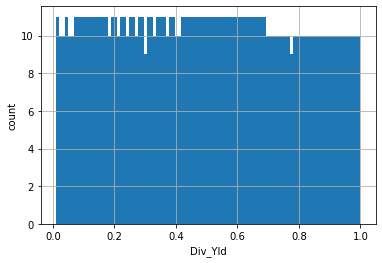

In [45]:
data[data['date'] == "2000-02-29"]["Div_Yld"].hist(bins = 100)
plt.ylabel('count')
plt.xlabel('Div_Yld')
plt.show()

The original labels (future returns) are numerical and will be used for regression exercises, that is, when the objective is to predict a scalar real number. Sometimes, the exercises can be different and the purpose may be to forecast categories (also called classes), like “buy”, “hold” or “sell”. In order to be able to perform this type of classification analysis, we create additional labels that are categorical.

In [68]:
sub_data = data[['date', 'R1M_Usd', 'R12M_Usd']]
data_median = sub_data.groupby('date').median()
data_median.columns = ['R1M_Usd_M', 'R12M_Usd_M']
data_ml = pd.merge(data, data_median, how = "left", on = "date")
data_ml['R1M_Usd_C'] = 1 * (data_ml['R1M_Usd'] > data_ml['R1M_Usd_M'])
data_ml['R12M_Usd_C'] = 1 * (data_ml['R12M_Usd'] > data_ml['R12M_Usd_M'])
data_ml

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd,R1M_Usd_M,R12M_Usd_M,R1M_Usd_C,R12M_Usd_C
0,1,2000-01-31,0.41,0.39,0.42,0.19,0.65,0.63,0.5,0.90,...,0.77,0.68,-0.036,0.196,0.255,1.044,-0.032,0.1440,0,1
1,1,2000-02-29,0.41,0.39,0.40,0.19,0.81,0.63,0.5,0.90,...,0.73,0.67,0.263,0.797,0.669,1.192,0.060,0.1900,1,1
2,1,2000-03-31,0.40,0.37,0.37,0.20,0.68,0.65,0.5,0.90,...,0.67,0.66,0.031,0.275,0.419,0.495,0.021,0.0790,1,1
3,1,2000-04-30,0.39,0.36,0.37,0.20,0.38,0.65,0.5,0.90,...,0.63,0.65,0.448,0.042,0.267,0.853,-0.006,0.1315,1,1
4,1,2000-05-31,0.40,0.42,0.40,0.20,0.60,0.65,0.5,0.90,...,0.54,0.67,-0.097,-0.071,0.027,0.413,-0.003,0.1750,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268331,1212,2018-08-31,0.85,0.84,0.85,0.43,0.93,0.66,1.0,0.93,...,0.69,0.85,0.044,-0.252,-0.144,0.000,-0.011,0.0000,1,0
268332,1212,2018-09-30,0.85,0.84,0.85,0.41,0.87,0.66,1.0,0.94,...,0.70,0.84,-0.266,-0.373,0.000,0.000,-0.079,0.0000,0,0
268333,1212,2018-10-31,0.86,0.87,0.86,0.41,0.91,0.66,1.0,0.94,...,0.87,0.87,0.013,0.043,0.000,0.000,0.036,0.0000,0,0
268334,1212,2018-11-30,0.86,0.88,0.86,0.41,0.91,0.66,1.0,0.94,...,0.88,0.87,-0.125,0.157,0.000,0.000,-0.105,0.0000,0,0


The new labels are binary: they are equal to 1 (true) if the original return is above that of the median return over the considered period and to 0 (false) if not. Hence, at each point in time, half of the sample has a label equal to zero and the other half to one: some stocks overperform and others underperform.

In machine learning, models are estimated on one portion of data (**training set**) and then tested on another portion of the data (**testing set**) to assess their quality. We split our sample accordingly.

In [70]:
separation_date = pd.to_datetime('2014-01-15')
training_sample = data_ml[data_ml['date'] < separation_date]
testing_sample = data_ml[data_ml['date'] >= separation_date]

We also keep in memory a few key variables, like the list of asset identifiers and a rectangular version of returns. For simplicity, in the computation of the latter, we shrink the investment universe to keep only the stocks for which we have the maximum number of points.

In [77]:
stock_days = data_ml[['date', 'stock_id']].groupby('stock_id').count()
stock_ids = stock_days[stock_days['date'] == max(stock_days['date'])].index
returns = data_ml[data_ml['stock_id'].isin(stock_ids)]
returns.pivot(index = "date", columns = "stock_id", values = "R1M_Usd")

stock_id,1,3,4,7,9,11,12,16,17,18,...,1199,1200,1201,1202,1203,1204,1208,1209,1210,1212
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-0.036,0.077,-0.016,-0.009,0.032,0.144,-0.110,-0.191,-0.103,0.098,...,-0.509,0.039,-0.011,-0.019,0.168,0.080,-0.372,-0.560,-0.006,-0.186
2000-02-29,0.263,-0.024,0.000,0.027,0.076,0.258,0.110,0.197,-0.053,-0.001,...,-0.147,0.017,-0.148,0.118,0.177,0.161,0.143,-0.102,-0.057,0.104
2000-03-31,0.031,0.018,0.153,0.000,-0.025,0.049,0.134,-0.030,0.074,-0.002,...,0.083,0.006,-0.025,-0.009,0.237,-0.008,0.057,0.144,0.085,-0.143
2000-04-30,0.448,0.027,-0.011,-0.017,-0.022,0.014,0.022,0.161,0.051,-0.037,...,-0.192,0.003,-0.061,0.053,-0.097,-0.114,0.070,-0.103,0.073,0.204
2000-05-31,-0.097,0.050,0.014,0.018,-0.121,-0.116,-0.038,-0.020,0.038,-0.131,...,-0.279,0.014,0.118,0.089,-0.023,-0.089,-0.137,0.113,0.016,0.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,-0.002,-0.049,0.036,-0.068,-0.028,0.146,0.040,0.016,0.297,0.025,...,-0.006,-0.005,-0.048,-0.010,0.037,0.005,0.126,-0.009,-0.011,0.044
2018-09-30,-0.155,-0.070,-0.025,-0.052,-0.098,-0.291,-0.044,-0.050,-0.150,-0.135,...,-0.064,-0.013,-0.070,-0.024,-0.030,-0.161,-0.119,0.000,0.028,-0.266
2018-10-31,0.014,0.036,0.000,0.007,-0.018,-0.100,0.074,0.094,-0.081,0.074,...,-0.075,0.068,0.051,0.078,-0.005,0.107,0.205,0.076,0.063,0.013
